# Telco Customer Churn Prediction 

*Dataset*: https://www.kaggle.com/blastchar/telco-customer-churn

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploring data:

- Customer ID column is not of use and can be dropped

In [79]:
df.drop('customerID', axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
# check datatypes of all columns

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- MonthlyCharges and TotalCharges both columns contains numbers but one is of float64 dtype and later is object dtype, so need to convert TotalCharges to numeric

In [81]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [82]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Directly using  pd.to_numeric(df.TotalCharges)  will give error as there are some blanks cells

In [83]:
pd.to_numeric(df.TotalCharges, errors='coerce')   #will ignore errors and put NA where blanks are present

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [84]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [85]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

Check TotalCharges column all are blanks for these 11 rows. We can drop these rows as less in numbers.

In [86]:
df1=df[df.TotalCharges!=' ']

In [87]:
df1.shape

(7032, 20)

Now blanks are gone, so now will try to convert to numeric dtype

In [88]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [89]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\HP\.conda\envs\tensorkeras\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [90]:
df1.TotalCharges.dtype

dtype('float64')

In [91]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Now let's check tenure column with respect to Churn column

In [92]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [93]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

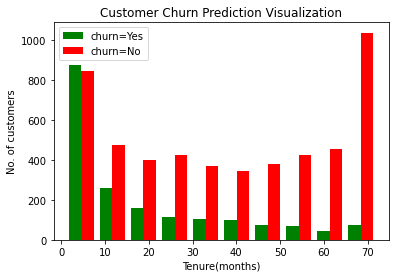

In [94]:
tenure_Churn_no=df1[df1.Churn=='No'].tenure
tenure_Churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_Churn_yes, tenure_Churn_no], color=['green','red'], label=['churn=Yes', 'churn=No'])
plt.legend()

plt.xlabel("Tenure(months)")
plt.ylabel("No. of customers")
plt.title("Customer Churn Prediction Visualization")

In the above graph custmoers with tenure 70 are not leaving in most cases

Now we can do same for MonthlyCharges

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

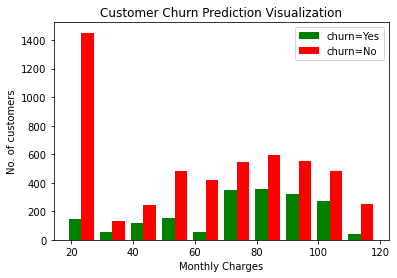

In [95]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color=['green','red'], label=['churn=Yes', 'churn=No'])
plt.legend()

plt.xlabel("Monthly Charges")
plt.ylabel("No. of customers")
plt.title("Customer Churn Prediction Visualization")

Now we will try to findout the unique values in each columns also find out Yes/No in columns for label encoding

In [96]:
for column in df1:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


For unique values in columns

In [97]:
for column in df:
    print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


To know which columns use python f function

In [98]:
for column in df:
    print(f' {column} {df[column].unique()}')

 gender ['Female' 'Male']
 SeniorCitizen [0 1]
 Partner ['Yes' 'No']
 Dependents ['No' 'Yes']
 tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 PhoneService ['No' 'Yes']
 MultipleLines ['No phone service' 'No' 'Yes']
 InternetService ['DSL' 'Fiber optic' 'No']
 OnlineSecurity ['No' 'Yes' 'No internet service']
 OnlineBackup ['Yes' 'No' 'No internet service']
 DeviceProtection ['No' 'Yes' 'No internet service']
 TechSupport ['No' 'Yes' 'No internet service']
 StreamingTV ['No' 'Yes' 'No internet service']
 StreamingMovies ['No' 'Yes' 'No internet service']
 Contract ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling ['Yes' 'No']
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCha

Now we will write a function to print only unique values for object datatype only and not on numerical. This will help for label encoding

In [99]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f' {column} {df[column].unique()}')

In [100]:
print_unique_col_values(df1)

 gender ['Female' 'Male']
 Partner ['Yes' 'No']
 Dependents ['No' 'Yes']
 PhoneService ['No' 'Yes']
 MultipleLines ['No phone service' 'No' 'Yes']
 InternetService ['DSL' 'Fiber optic' 'No']
 OnlineSecurity ['No' 'Yes' 'No internet service']
 OnlineBackup ['Yes' 'No' 'No internet service']
 DeviceProtection ['No' 'Yes' 'No internet service']
 TechSupport ['No' 'Yes' 'No internet service']
 StreamingTV ['No' 'Yes' 'No internet service']
 StreamingMovies ['No' 'Yes' 'No internet service']
 Contract ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling ['Yes' 'No']
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn ['No' 'Yes']


In [101]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\HP\.conda\envs\tensorkeras\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [102]:
print_unique_col_values(df1)

 gender ['Female' 'Male']
 Partner ['Yes' 'No']
 Dependents ['No' 'Yes']
 PhoneService ['No' 'Yes']
 MultipleLines ['No' 'Yes']
 InternetService ['DSL' 'Fiber optic' 'No']
 OnlineSecurity ['No' 'Yes']
 OnlineBackup ['Yes' 'No']
 DeviceProtection ['No' 'Yes']
 TechSupport ['No' 'Yes']
 StreamingTV ['No' 'Yes']
 StreamingMovies ['No' 'Yes']
 Contract ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling ['Yes' 'No']
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn ['No' 'Yes']


In [103]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn',]

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\HP\.conda\envs\tensorkeras\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [104]:
for col in df1:
    print(f' {col} {df1[col].unique()}')

 gender ['Female' 'Male']
 SeniorCitizen [0 1]
 Partner [1 0]
 Dependents [0 1]
 tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService [0 1]
 MultipleLines [0 1]
 InternetService ['DSL' 'Fiber optic' 'No']
 OnlineSecurity [0 1]
 OnlineBackup [1 0]
 DeviceProtection [0 1]
 TechSupport [0 1]
 StreamingTV [0 1]
 StreamingMovies [0 1]
 Contract ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling [1 0]
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn [0 1]


Now replace gender col with 1 and 0

In [105]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [106]:
df1['gender'].unique()

array([1, 0], dtype=int64)

Now for other 3 columns use Get dummies One hOt Encode

In [107]:
df2=pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [108]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2656,1,0,0,0,39,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6505,0,0,1,1,56,1,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1486,1,0,0,0,2,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2735,0,1,0,0,52,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [109]:
df2.shape

(7032, 27)

In [110]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Now all dtypes are numbers.

Now we need scaling. All the columns are in range 0 to 1, except tenure, monthly charges and total charges

In [111]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

Now check unique values as previous

In [112]:
for col in df2:
    print(f' {col} {df2[col].unique()}')

 gender [1 0]
 SeniorCitizen [0 1]
 Partner [1 0]
 Dependents [0 1]
 tenure [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
 PhoneService [0 1]
 MultipleLines [0 1]
 OnlineSecurity [0 1]
 OnlineBackup [1 0]
 DeviceProtection [0 1]
 TechSupport [

Go for train test

In [113]:
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=5)

In [115]:
X_train.shape

(5625, 26)

In [116]:
X_test.shape

(1407, 26)

In [118]:
len(X_train.columns)

26

Now build a NN

In [119]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 911us/step - loss: 0.6136 - accuracy: 0.6432
Epoch 2/100
176/176 [==============================] - 0s 714us/step - loss: 0.4612 - accuracy: 0.7744
Epoch 3/100
176/176 [==============================] - 0s 697us/step - loss: 0.4289 - accuracy: 0.7961
Epoch 4/100
176/176 [==============================] - 0s 686us/step - loss: 0.4207 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 0s 698us/step - loss: 0.4170 - accuracy: 0.8009
Epoch 6/100
176/176 [==============================] - 0s 701us/step - loss: 0.4155 - accuracy: 0.8016
Epoch 7/100
176/176 [==============================] - 0s 704us/step - loss: 0.4142 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 654us/step - loss: 0.4129 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 0s 655us/step - loss: 0.4113 - accuracy: 0.8062
Epoch 10/100
176/176 [==============================] - 0s 744us/step - l

176/176 [==============================] - 0s 679us/step - loss: 0.3816 - accuracy: 0.8235
Epoch 80/100
176/176 [==============================] - 0s 630us/step - loss: 0.3816 - accuracy: 0.8226
Epoch 81/100
176/176 [==============================] - 0s 685us/step - loss: 0.3811 - accuracy: 0.8220
Epoch 82/100
176/176 [==============================] - 0s 638us/step - loss: 0.3805 - accuracy: 0.8228
Epoch 83/100
176/176 [==============================] - 0s 691us/step - loss: 0.3804 - accuracy: 0.8236
Epoch 84/100
176/176 [==============================] - 0s 663us/step - loss: 0.3807 - accuracy: 0.8231
Epoch 85/100
176/176 [==============================] - 0s 651us/step - loss: 0.3800 - accuracy: 0.8251
Epoch 86/100
176/176 [==============================] - 0s 809us/step - loss: 0.3798 - accuracy: 0.8226
Epoch 87/100
176/176 [==============================] - 0s 829us/step - loss: 0.3802 - accuracy: 0.8236
Epoch 88/100
176/176 [==============================] - 0s 776us/step - loss:

In [120]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 607us/step - loss: 0.4580 - accuracy: 0.7839


[0.45798152685165405, 0.7839374542236328]

In [121]:
yp=model.predict(X_test)
yp[:5]

array([[0.29635972],
       [0.33837909],
       [0.00610965],
       [0.8668891 ],
       [0.48246413]], dtype=float32)

It is predicting. But it has 2d array. Conver in 1d array, as y_test in 0 and 1 only.

In [122]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

If yp is > 0.5 convert to 1 or 0

In [124]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [125]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [126]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [127]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

Now print Classification report

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.53      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Let's check confusion matrics first

Text(69.0, 0.5, 'Truth')

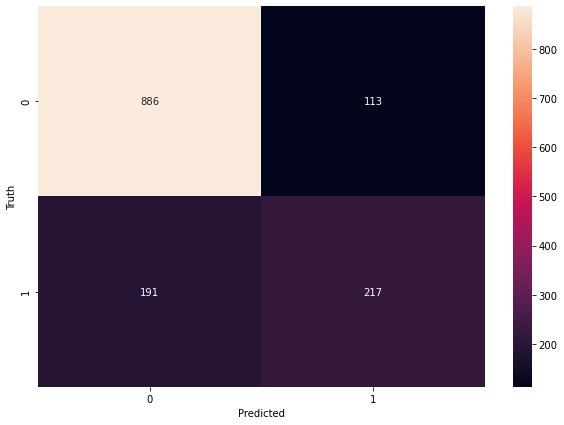

In [129]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')